In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.formula.api as smf

from pandas import ExcelWriter
from pandas import ExcelFile

from sklearn import linear_model
import sklearn.model_selection as model_selection
#from sklearn.linear_model import LogisticRegression, LinearRegression

In [72]:
covid_data = pd.read_excel('Covid-19 data.xlsx')
covid_data = covid_data.dropna()
covid_data = covid_data[covid_data.state != 'New York']
#covid_data

Text(0, 0.5, 'num_covid_cases')

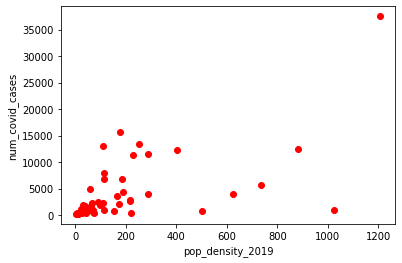

In [73]:
plt.scatter(covid_data["pop_density_2019"], covid_data["num_covid_cases"], color = 'red')
plt.xlabel('pop_density_2019')
plt.ylabel('num_covid_cases')


Text(0, 0.5, 'num_deaths')

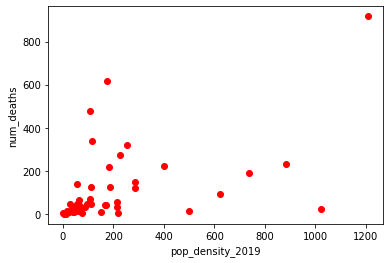

In [74]:
plt.scatter(covid_data["pop_density_2019"], covid_data["num_deaths"], color = 'red')
plt.xlabel('pop_density_2019')
plt.ylabel('num_deaths')

Text(0, 0.5, 'num_covid_cases')

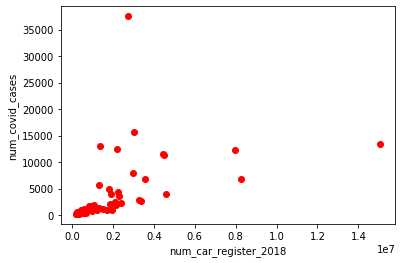

In [75]:
plt.scatter(covid_data["num_car_register_2018"], covid_data["num_covid_cases"], color = 'red')
plt.xlabel('num_car_register_2018')
plt.ylabel('num_covid_cases')

Text(0, 0.5, 'num_deaths')

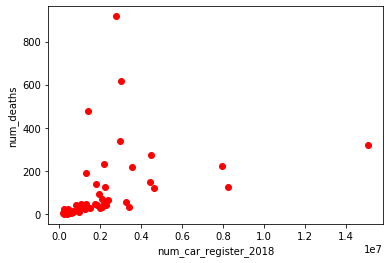

In [76]:
plt.scatter(covid_data["num_car_register_2018"], covid_data["num_deaths"], color = 'red')
plt.xlabel('num_car_register_2018')
plt.ylabel('num_deaths')

In [77]:
#Linear Regression with Deaths as the response variable

reg = linear_model.LinearRegression()
reg.fit(covid_data[['pop_density_2019','num_car_register_2018','num_hospitals_2019','num_active_doct_2019', 'avg_income_2019', 'proportion_uninsured_2018']], covid_data[['num_deaths']])
                

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
reg.coef_

#Shows some unexpected observations: as number of automobile registrations decreases, the number of deaths decreases.
#Likewise, as unexpected, as number of active physicians increases, the number of deaths increases.
#Also, as the average household income increases, the number of deaths decreases. 
#The coefficient for proportion uninsured variable is very large in comparison to the other coefficients (about 677).

array([[ 2.22747695e-01, -6.35669682e-05, -4.01375423e-01,
         1.22555097e-02, -3.88421779e-04,  6.77432661e+02]])

In [79]:
reg.intercept_

#intercept is slightly negative

array([-15.43035155])

In [80]:
#Linear Regression with Covid Cases as the response variable

reg2 = linear_model.LinearRegression()
reg2.fit(covid_data[['pop_density_2019','num_car_register_2018','num_hospitals_2019','num_active_doct_2019', 'avg_income_2019', 'proportion_uninsured_2018']], covid_data[['num_covid_cases']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
reg2.coef_

array([[ 1.03720779e+01, -2.42227463e-03, -1.50598928e+01,
         4.78760325e-01,  1.74907661e-03,  4.27935127e+04]])

In [82]:
reg2.intercept_

#intercept is very negative

array([-3912.79702327])

In [100]:
model = smf.ols(formula = 'num_covid_cases ~ pop_density_2019 + num_car_register_2018 + num_hospitals_2019 + num_active_doct_2019 + avg_income_2019 + proportion_uninsured_2018', data = covid_data).fit()
summary = model.summary()
summary.tables[1]

#The following predictor variables have significant (<0.05) p-values: 

#pop_density_2019, num_active_doct_2019

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3912.7970,6472.641,-0.605,0.549,-1.7e+04,9149.522
pop_density_2019,10.3721,3.105,3.341,0.002,4.106,16.638
num_car_register_2018,-0.0024,0.001,-1.979,0.054,-0.005,4.74e-05
num_hospitals_2019,-15.0599,32.642,-0.461,0.647,-80.934,50.814
num_active_doct_2019,0.4788,0.184,2.595,0.013,0.106,0.851
avg_income_2019,0.0017,0.069,0.025,0.980,-0.137,0.140
proportion_uninsured_2018,4.279e+04,3.09e+04,1.386,0.173,-1.95e+04,1.05e+05


In [101]:
model = smf.ols(formula = 'num_covid_cases ~ pop_density_2019 + num_car_register_2018 + num_hospitals_2019 + num_active_doct_2019 + avg_income_2019 + proportion_uninsured_2018 + num_hospitals_2019*num_active_doct_2019 + pop_density_2019*num_active_doct_2019', data = covid_data).fit()
summary = model.summary()
summary.tables[1]

#There's a significant interaction between pop_density_2019 and num_active_doct_2019

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1545.7743,5840.473,-0.265,0.793,-1.33e+04,1.03e+04
pop_density_2019,-1.4665,4.253,-0.345,0.732,-10.061,7.128
num_car_register_2018,-0.0005,0.001,-0.410,0.684,-0.003,0.002
num_hospitals_2019,40.0319,32.124,1.246,0.220,-24.894,104.958
num_active_doct_2019,0.0408,0.201,0.203,0.840,-0.366,0.447
avg_income_2019,0.0127,0.060,0.211,0.834,-0.109,0.135
proportion_uninsured_2018,3255.1362,2.9e+04,0.112,0.911,-5.54e+04,6.19e+04
num_hospitals_2019:num_active_doct_2019,-0.0004,0.000,-1.460,0.152,-0.001,0.000
pop_density_2019:num_active_doct_2019,0.0007,0.000,3.474,0.001,0.000,0.001


In [102]:
model = smf.ols(formula = 'num_deaths ~ pop_density_2019 + num_car_register_2018 + num_hospitals_2019 + num_active_doct_2019 + avg_income_2019 + proportion_uninsured_2018', data = covid_data).fit()
summary = model.summary()
summary.tables[1]

#The following predictor variables have significant (<0.05) p-values: 

#pop_density_2019, num_active_doct_2019

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-15.4304,207.067,-0.075,0.941,-433.309,402.448
pop_density_2019,0.2227,0.099,2.243,0.030,0.022,0.423
num_car_register_2018,-6.357e-05,3.91e-05,-1.624,0.112,-0.000,1.54e-05
num_hospitals_2019,-0.4014,1.044,-0.384,0.703,-2.509,1.706
num_active_doct_2019,0.0123,0.006,2.076,0.044,0.000,0.024
avg_income_2019,-0.0004,0.002,-0.177,0.860,-0.005,0.004
proportion_uninsured_2018,677.4327,987.829,0.686,0.497,-1316.087,2670.952


In [103]:
model = smf.ols(formula = 'num_deaths ~ pop_density_2019 + num_car_register_2018 + num_hospitals_2019 + num_active_doct_2019 + avg_income_2019 + proportion_uninsured_2018 + num_hospitals_2019*num_active_doct_2019 + pop_density_2019*num_active_doct_2019', data = covid_data).fit()
summary = model.summary()
summary.tables[1] 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.9844,205.551,0.005,0.996,-414.449,416.418
pop_density_2019,0.0153,0.150,0.102,0.919,-0.287,0.318
num_car_register_2018,-1.311e-05,4.57e-05,-0.287,0.776,-0.000,7.92e-05
num_hospitals_2019,0.7009,1.131,0.620,0.539,-1.584,2.986
num_active_doct_2019,0.0044,0.007,0.628,0.534,-0.010,0.019
avg_income_2019,-7.981e-05,0.002,-0.038,0.970,-0.004,0.004
proportion_uninsured_2018,-92.5391,1021.982,-0.091,0.928,-2158.041,1972.963
num_hospitals_2019:num_active_doct_2019,-1.517e-05,1.03e-05,-1.474,0.148,-3.6e-05,5.62e-06
pop_density_2019:num_active_doct_2019,1.098e-05,6.68e-06,1.645,0.108,-2.51e-06,2.45e-05
